In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# To ignore warnings
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
telecomdf=pd.read_csv("telecom_churn_data.csv")

In [3]:
print(telecomdf.info(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

### Clean-up

In [4]:
len(telecomdf['mobile_number'].unique())

99999

In [5]:
telecomdf.shape

(99999, 226)

In [6]:
telecomdf.drop(['mobile_number','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','circle_id',
                'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','std_og_t2c_mou_6',
               'std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
               'std_ic_t2o_mou_8','std_ic_t2o_mou_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
               'date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'
                ,'date_of_last_rech_data_9'],axis=1,inplace=True)


In [7]:
headers=list(telecomdf.columns)


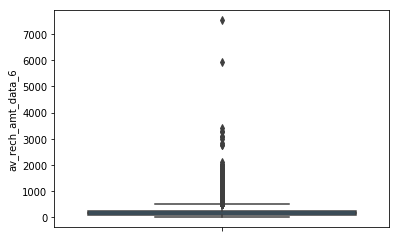

In [8]:
sns.boxplot(y=telecomdf['av_rech_amt_data_6'])

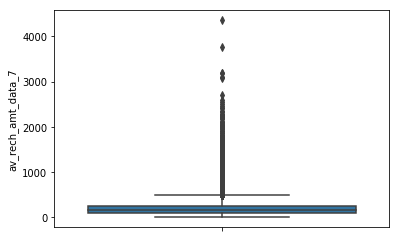

In [9]:
sns.boxplot(y=telecomdf['av_rech_amt_data_7'])

In [10]:
print(telecomdf['total_rech_amt_6'].mean())
telecomdf['total_rech_amt_7'].mean()

327.51461514615147


322.9629696296963

In [11]:
telecomdf['av_rech_amt_data_7'].fillna(0,inplace=True)

In [12]:
telecomdf['av_rech_amt_data_6'].fillna(0,inplace=True)

In [13]:
telecomdf['total_rech_amt_6_7']=telecomdf[['total_rech_amt_6','total_rech_amt_7']].apply(np.mean,axis=1)
telecomdf['total_rech_amt_6_7']

0         307.0
1         229.0
2         241.5
3         270.0
4         273.0
5          60.0
6         360.5
7        1185.0
8         519.0
9         207.5
10          0.0
11        183.0
12        110.0
13        380.0
14         50.0
15        343.0
16        459.0
17        408.0
18         45.0
19        224.0
20        343.5
21        640.0
22        142.5
23        227.0
24        385.0
25        311.0
26         77.0
27         30.0
28         96.5
29         98.0
          ...  
99969      74.0
99970     392.0
99971     165.0
99972       0.0
99973     113.5
99974     465.0
99975      82.0
99976     244.5
99977      90.0
99978       0.0
99979      55.0
99980     343.0
99981     312.0
99982      77.0
99983     195.0
99984     299.5
99985      48.5
99986     848.5
99987     186.5
99988     467.0
99989     145.0
99990      94.5
99991     160.0
99992     120.0
99993       0.0
99994      85.0
99995     110.0
99996      59.5
99997     369.5
99998     355.0
Name: total_rech_amt_6_7

In [14]:
average=telecomdf['total_rech_amt_6_7'].quantile(.7)
average

368.5

In [15]:
highchurndf=telecomdf[telecomdf['total_rech_amt_6_7'] >= average]
highchurndf

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,1185.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00,519.0
13,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.00,380.0
16,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.00,459.0
17,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,...,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.00,408.0
21,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,...,NaN,NaN,NaN,NaN,720,0.00,0.00,0.00,0.00,640.0
24,422.050,359.730,354.793,473.030,124.19,55.19,141.11,138.04,450.33,370.48,...,NaN,NaN,NaN,NaN,3072,0.00,0.00,0.00,0.00,385.0
33,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,1.0,1.0,1.0,1328,358.10,2706.83,1714.67,0.00,1932.0
38,363.987,486.558,393.909,391.709,248.99,619.96,666.38,494.79,88.86,50.58,...,NaN,NaN,NaN,0.0,1155,0.00,0.00,0.00,0.00,528.0
41,482.832,425.764,229.769,143.596,86.39,118.88,80.44,40.06,232.36,280.78,...,NaN,NaN,NaN,NaN,2010,0.00,0.00,0.00,0.00,503.0


In [16]:
highchurn_usage=highchurndf[~(highchurndf['arpu_6'] < 4) | (highchurndf['arpu_7'] < 4)]
highchurn_usage.shape

(29783, 202)

#### Dropping the Columns

In [17]:
highchurn_usage.shape

(29783, 202)

In [18]:
def bootstrap(df, n = None, iterations = 2000):
    if n == None:
        n = len(X)
    X_resampled = np.random.choice(df.values, size = (iterations, n), replace = True)
    return X_resample

In [19]:
#for col in highchurn_usage.columns:
 #   highchurn_res = bootstrap_resample(highchurn_usage[col])
#X_resample=bootstrap(highchurn_usage)

In [20]:
#re_usage=bootstrap(highchurn_usage)

In [21]:
highchurn_usage.fillna(0, inplace=True)

In [22]:
#rows = np.random.choice(highchurn_usage.index.values, 10)
#sampled_df = highchurn_usage.ix[rows]
#sampled_df

In [23]:
highchurn_usage

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,...,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1185.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,0.0,1.0,1.0,0.0,315,21.03,910.65,122.16,0.00,519.0
13,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,...,0.0,0.0,1.0,0.0,2607,0.00,0.00,0.00,0.00,380.0
16,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,...,0.0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.00,459.0
17,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,...,0.0,0.0,0.0,0.0,667,0.00,0.00,0.00,0.00,408.0
21,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,...,0.0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,640.0
24,422.050,359.730,354.793,473.030,124.19,55.19,141.11,138.04,450.33,370.48,...,0.0,0.0,0.0,0.0,3072,0.00,0.00,0.00,0.00,385.0
33,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,1.0,1.0,1.0,1328,358.10,2706.83,1714.67,0.00,1932.0
38,363.987,486.558,393.909,391.709,248.99,619.96,666.38,494.79,88.86,50.58,...,0.0,0.0,0.0,0.0,1155,0.00,0.00,0.00,0.00,528.0
41,482.832,425.764,229.769,143.596,86.39,118.88,80.44,40.06,232.36,280.78,...,0.0,0.0,0.0,0.0,2010,0.00,0.00,0.00,0.00,503.0


In [24]:
highchurn_usage.loc[((highchurn_usage['total_ic_mou_9']==0)& 
                (highchurn_usage['total_og_mou_9']==0)&
                (highchurn_usage['vol_2g_mb_9']==0) & 
                (highchurn_usage['vol_3g_mb_9']==0)),'churn']=1

In [25]:
len(highchurn_usage[highchurn_usage.churn==1])/len(highchurn_usage)*100

8.53507034214149

In [26]:
#highchurn_usage=highchurn_usage.sample(frac=.6,replace=True)
highchurn_usage['churn'].fillna(0,inplace=True)
highchurn_usage[highchurn_usage.churn==1].shape

(2542, 203)

In [27]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = highchurn_usage[highchurn_usage.churn==0]
df_minority = highchurn_usage[highchurn_usage.churn==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=10000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.churn.value_counts()

0.0    27241
1.0    10000
Name: churn, dtype: int64

In [28]:
highchurn_usage=df_upsampled
highchurn_usage[(highchurn_usage.duplicated()==True) & (highchurn_usage.churn == 1)]

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,churn
53387,1733.190,1532.362,441.554,443.589,3355.29,1829.83,265.96,242.96,670.53,1355.41,...,0.0,0.0,0.0,944,0.00,0.00,0.00,0.0,1921.0,1.0
3942,984.262,734.261,612.875,52.700,73.98,10.39,7.44,0.00,2055.28,1659.78,...,0.0,0.0,0.0,620,0.00,0.00,0.00,0.0,968.5,1.0
14293,521.920,-158.963,950.500,0.000,7.61,0.00,6.51,0.00,270.11,0.55,...,0.0,0.0,0.0,444,0.00,0.00,0.00,0.0,810.0,1.0
48980,714.049,804.371,0.000,0.000,4.93,0.00,0.00,0.00,1183.64,1118.93,...,0.0,0.0,0.0,329,0.00,0.00,0.00,0.0,862.5,1.0
47950,1750.056,784.018,19.000,0.000,1846.79,573.46,0.00,0.00,781.71,155.63,...,1.0,0.0,0.0,1080,0.00,357.87,704.34,0.0,1372.5,1.0
3077,664.121,261.334,3.800,1.000,1.81,0.00,2.36,0.00,939.26,404.26,...,0.0,0.0,0.0,214,0.00,0.00,0.00,0.0,508.5,1.0
33073,820.404,807.275,1145.468,0.000,225.76,351.86,748.38,0.00,1626.33,1397.31,...,1.0,1.0,0.0,900,0.00,0.00,0.00,0.0,944.5,1.0
59555,186.063,614.919,209.045,0.000,83.21,396.83,136.19,0.00,127.14,422.38,...,0.0,0.0,0.0,219,0.00,0.00,0.00,0.0,463.0,1.0
85021,648.605,17.275,55.794,3.000,95.41,1.66,9.68,1.10,1418.83,10.04,...,0.0,0.0,0.0,986,0.00,0.00,0.00,0.0,370.5,1.0
16685,546.750,402.535,161.555,88.737,83.14,69.08,4.08,0.13,600.69,441.63,...,1.0,1.0,0.0,693,25.75,0.00,356.95,0.0,560.0,1.0


In [29]:
highchurn_usage['churn'].fillna(0,inplace=True)

In [30]:
telecomchurn = highchurn_usage[highchurn_usage.columns.drop(list(highchurn_usage.filter(regex='_9')))]

In [31]:
telecomchurn.shape

(37241, 154)

### Building Model

In [32]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecomchurn.drop(['churn'],axis=1)

# Putting response variable to y
y = telecomchurn['churn']

y.head()

8     0.0
13    0.0
16    0.0
17    0.0
21    0.0
Name: churn, dtype: float64

In [33]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)

# Splitting the data into train and te
scaleddf=X_scaler.transform(X.values)
telecomchurn = pd.DataFrame(scaleddf, index=X.index, columns=X.columns)

In [34]:
telecomchurn

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7
8,-0.503710,-0.179188,-0.696834,0.179629,0.092683,-0.450696,-0.686412,-0.675551,-0.421817,-0.207514,...,-0.135469,-0.693832,1.461806,1.602125,-0.921828,-0.246385,2.043436,0.020046,-0.121138,-0.378330
13,-0.257212,-0.796189,0.248796,0.355695,-0.399602,0.663644,-0.053780,-0.597619,0.346092,0.026447,...,-0.135469,-0.693832,-0.684085,1.602125,1.494470,-0.304339,-0.316201,-0.299095,-0.121138,-0.666626
16,-0.390847,-0.593363,-0.592020,-0.546427,-0.469354,-0.371378,-0.286106,-0.374892,-0.363488,-0.207514,...,-0.135469,-0.693832,-0.684085,-0.624171,-0.715198,-0.304339,-0.309853,-0.241908,-0.121138,-0.502774
17,0.168638,-1.198170,-0.928862,1.723421,-0.600682,-0.511619,-0.751968,-0.838129,-0.712441,-0.207514,...,-0.135469,-0.693832,-0.684085,-0.624171,-0.550738,-0.304339,-0.316201,-0.299095,-0.121138,-0.608552
21,-0.210543,0.048038,0.341098,-0.442670,-0.351477,-0.338940,0.630412,0.969894,1.457916,-0.207514,...,-0.135469,-0.693832,-0.684085,-0.624171,-0.494864,-0.304339,-0.316201,-0.299095,-0.121138,-0.127367
24,-0.410124,-0.464471,-0.245836,-0.399129,-0.507537,-0.213991,0.019718,-0.091111,-0.095814,-0.115043,...,-0.135469,-0.693832,-0.684085,-0.624171,1.984687,-0.304339,-0.316201,-0.299095,-0.121138,-0.656255
33,0.788555,3.848588,-0.132922,-0.647404,-0.619510,-0.529010,-0.874346,-0.838129,-0.724737,-0.207514,...,-0.135469,1.441270,1.461806,1.602125,0.146108,0.682503,6.697620,4.180453,-0.121138,2.552334
38,-0.535534,-0.191386,-0.164701,-0.149633,0.638306,0.958637,-0.697927,-0.736142,-0.507646,-0.207514,...,-0.135469,-0.693832,-0.684085,-0.624171,-0.036274,-0.304339,-0.316201,-0.299095,-0.121138,-0.359663
41,-0.278841,-0.322287,-0.505162,-0.474697,-0.378319,-0.349433,-0.413029,-0.271978,-0.421351,-0.207514,...,-0.135469,-0.693832,-0.684085,-0.624171,0.865094,-0.304339,-0.316201,-0.299095,-0.121138,-0.411515
48,2.724368,0.001042,-0.610016,3.474246,1.168793,-0.178719,1.285241,-0.317326,-0.573410,-0.207514,...,-0.135469,-0.693832,-0.684085,-0.624171,0.079692,-0.304339,-0.316201,-0.299095,-0.121138,1.549520


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9,test_size=0.1,random_state=100)

### PCA

In [36]:
#Improting the PCA module
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

pca = PCA(.9)

In [37]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
pca.components_

array([[ 1.27340026e-01,  1.52081356e-01,  1.38292653e-01, ...,
        -2.80519141e-02, -3.46933803e-04,  1.66421533e-01],
       [ 1.21330781e-01,  1.61457547e-01,  1.85017994e-01, ...,
         1.55623499e-01,  5.14301114e-03,  1.67112482e-01],
       [ 2.86812316e-02,  7.81195413e-02,  1.41022671e-01, ...,
        -6.78792962e-02,  1.47345865e-04,  6.94645644e-02],
       ...,
       [-1.01916068e-01,  2.71589512e-02,  7.05357199e-02, ...,
         1.34423559e-01,  4.02992680e-03, -4.49799191e-02],
       [-1.44813579e-01,  7.54834755e-02,  1.17396894e-01, ...,
        -1.86329106e-01, -3.48993457e-03, -3.19495546e-02],
       [ 2.37446466e-01, -7.38998953e-02, -1.81369469e-01, ...,
        -2.65747572e-01, -8.86208754e-03,  8.80738384e-02]])

In [39]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[3], 'Feature':colnames})
pcs_df.head(30)

,Feature,PC1,PC2,PC3
0,arpu_6,0.127340,0.121331,0.189448
1,arpu_7,0.152081,0.161458,0.055922
2,arpu_8,0.138293,0.185018,-0.032609
3,onnet_mou_6,0.155896,-0.044238,-0.176374
4,onnet_mou_7,0.179035,-0.022383,-0.299600
5,onnet_mou_8,0.150480,0.007081,-0.300421
6,offnet_mou_6,0.155605,-0.009095,0.350228
7,offnet_mou_7,0.177687,0.016103,0.224946
8,offnet_mou_8,0.142834,0.048156,0.077344
9,roam_ic_mou_6,-0.000540,0.002715,0.003732


In [40]:
pca.explained_variance_ratio_

array([0.24027513, 0.16091844, 0.10370241, 0.07269998, 0.06714076,
       0.05704326, 0.05238359, 0.02977709, 0.02831128, 0.02395377,
       0.01520402, 0.01341523, 0.01303263, 0.01144197, 0.01124623])

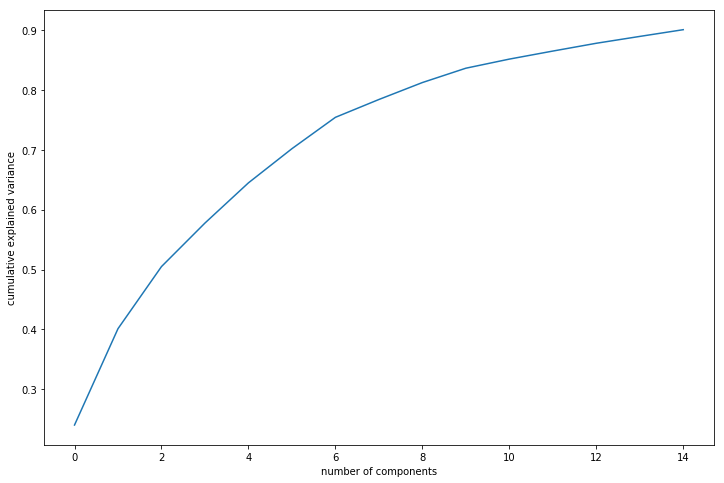

In [41]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [42]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([24.03, 40.12, 50.49, 57.76, 64.47, 70.17, 75.41, 78.39, 81.22,
       83.62, 85.14, 86.48, 87.78, 88.92, 90.04])

In [43]:
df_train_pca = pca.transform(X_train)
df_train_pca.shape

(33516, 15)

In [44]:
df_test_pca = pca.transform(X_test)

In [45]:
corrmat = np.round(np.corrcoef(df_train_pca.transpose()),decimals=3)

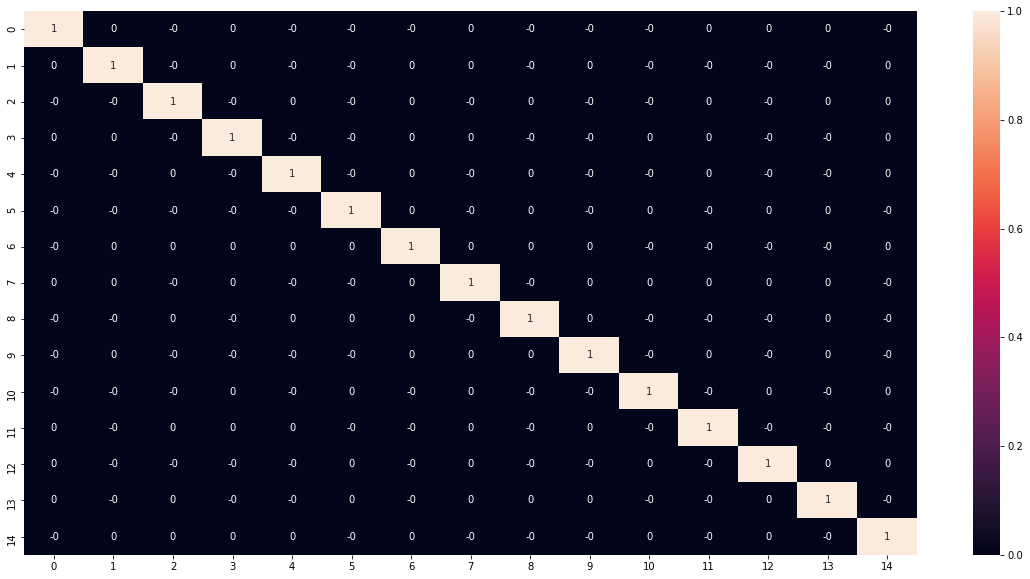

In [46]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

###  Applying Logistic Regression

In [47]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [49]:
np.round(metrics.mean_squared_error(y_test, y_pred),decimals=2)

0.15

In [50]:
#Making prediction on the test data*
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [52]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
confusion=metrics.confusion_matrix(y_pred=y_pred,y_true=y_test)
print(confusion)

accuracy: 0.8464429530201343 

[[2560  184]
 [ 388  593]]


In [139]:
df_train_pca

array([[ 1362.84221109,  -806.15482484,  -318.71856702, ...,
         -973.1448176 ,  1270.28723459,  -571.6441142 ],
       [ -833.10553934,  -301.16362968,   841.80315399, ...,
          146.73090947,  -126.26972291,  -115.95593833],
       [-1465.0201402 ,  -159.86327137,   946.58567541, ...,
           47.81384596,   436.86882035,  -279.28150003],
       ..., 
       [ -626.48545895,  -746.88179051,  -719.01949823, ...,
            4.92148976,   263.33879421,    49.69214354],
       [ -800.51522007,  2857.86780615,   660.69643621, ...,
         -224.91879636,   306.81251145,   -45.93158536],
       [-1364.71635707,   560.27958643,  -880.70522795, ...,
          173.86852806,  -218.45166936,  -364.32390586]])

#### 92% Accuracy and Confusion Matrix

In [59]:
predectedDf=X_test
predectedDf['churn']=y_pred.tolist()
predectedDf.shape

(3725, 154)

In [61]:
predectedDf[predectedDf['churn']==1].head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,churn
9477,902.785,1570.156,543.257,920.29,2893.19,524.58,135.99,420.26,45.38,310.63,...,0.0,0.0,0.0,311,0.00,0.00,0.00,0.0,1537.5,1.0
37767,475.203,275.378,17.991,219.16,104.19,2.33,135.06,68.98,2.48,0.00,...,0.0,0.0,0.0,1576,0.00,0.00,0.00,0.0,425.0,1.0
80806,582.995,437.850,0.350,1404.54,989.19,0.00,74.64,45.44,2.90,0.00,...,0.0,0.0,0.0,757,0.00,0.00,0.00,0.0,566.0,1.0
19518,1621.163,907.267,468.213,1904.86,1026.94,690.11,1161.91,450.44,276.91,0.00,...,1.0,1.0,1.0,354,0.00,0.00,0.00,0.0,1464.0,1.0
38004,421.053,307.858,128.830,10.38,36.44,0.00,126.79,81.23,39.66,0.00,...,0.0,1.0,0.0,230,7.84,114.95,149.67,0.0,497.0,1.0


In [142]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [143]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.604485219164


In [144]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.932944606414


In [145]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred))

precision 0.763191763192
0.763191763192


In [137]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred))

precision 0.626016260163
PRECISION SCORE : 0.763191763192
RECALL SCORE : 0.604485219164
F1 SCORE : 0.674630261661


## Optimal Cutoff

In [66]:
y_pred_prob = model_pca.predict_proba(df_test_pca)

In [67]:
y_pred_df = pd.DataFrame(y_pred_prob)

In [68]:
y_pred_df.head()

,0,1
0,0.039210,0.960790
1,0.996964,0.003036
2,0.810779,0.189221
3,0.828450,0.171550
4,0.464745,0.535255


In [64]:
y_pred_1 = y_pred_df.iloc[:,[1]]

In [65]:
y_pred_1.head()

,1
0,0.960790
1,0.003036
2,0.189221
3,0.171550
4,0.535255


In [71]:
y_test_df = pd.DataFrame(y_test)

In [72]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [73]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [74]:
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [75]:
y_pred_final.head()

,churn,Churn_Prob
0,0.0,0.960790
1,0.0,0.003036
2,0.0,0.189221
3,0.0,0.171550
4,1.0,0.535255


In [121]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [122]:
y_pred_final.head()

,churn,Churn_Prob,predicted
0,0.0,0.960778,1
1,0.0,0.003042,0
2,0.0,0.189313,0
3,0.0,0.171617,0
4,1.0,0.535261,1


In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.960778,1,1,1,1,1,1,1,1,1,1,1
1,0.0,0.003042,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.189313,0,1,1,0,0,0,0,0,0,0,0
3,0.0,0.171617,0,1,1,0,0,0,0,0,0,0,0
4,1.0,0.535261,1,1,1,1,1,1,1,0,0,0,0


In [124]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.263356  0.000000  1.000000
0.1   0.1  0.579060  0.455175  0.925586
0.2   0.2  0.743893  0.705539  0.851172
0.3   0.3  0.819866  0.832362  0.784913
0.4   0.4  0.847248  0.895773  0.711519
0.5   0.5  0.846443  0.932945  0.604485
0.6   0.6  0.831946  0.956997  0.482161
0.7   0.7  0.797047  0.975948  0.296636
0.8   0.8  0.769128  0.989796  0.151886
0.9   0.9  0.752483  0.995262  0.073394


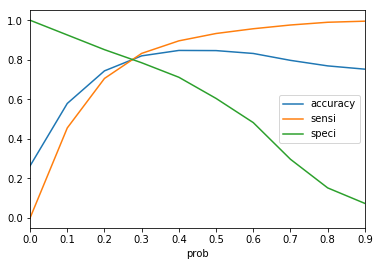

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [126]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)
len(y_pred_final[y_pred_final.churn==1])/(len(y_pred_final[y_pred_final.final_predicted==1]))

0.7975609756097561

In [127]:
metrics.accuracy_score( y_pred_final.churn, y_pred_final.final_predicted)

0.81986577181208053

In [147]:
confusion=metrics.confusion_matrix( y_pred_final.churn, y_pred_final.final_predicted )

In [148]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [149]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)

print("specificity",specificity)
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred))
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred))

sensitivity 0.784913353721
specificity 0.832361516035
precision 0.626016260163
0.763191763192
precision 0.626016260163
PRECISION SCORE : 0.763191763192
RECALL SCORE : 0.604485219164
F1 SCORE : 0.674630261661
